In [58]:
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_analysis_tools as gat
from visual_behavior_glm.glm import GLM
from visual_behavior.data_access import loading
import pandas as pd
import seaborn as sns
import numpy as np
import time
import os
from scipy import stats

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [28]:
colors = gvt.project_colors()

In [4]:
basepath = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/single_cell_metrics/cell_metrics'

In [5]:
pd.read_hdf(os.path.join(basepath, 'experiment_id_909177759_traces_none_full_session_dFF.h5')).head()

cell_specimen_id  robust_signal  robust_noise  robust_snr  trace_max  trace_mean  trace_var  trace_std  trace_max_over_std  trace_mean_over_std  population_coupling_r_value  population_coupling_p_value  ophys_experiment_id  ophys_session_id   condition session_subset stimuli  events
0        1086569523       0.140724      0.095111    1.479574   1.168315    0.004028   0.009730   0.098639           11.844393             0.040840                     0.115530                4.037396e-143            909177759         908441202  full_trace   full_session    None   False
1        1086528727       0.174436      0.117876    1.479825   1.391609    0.004977   0.015505   0.124519           11.175907             0.039969                     0.107750                1.202359e-124            909177759         908441202  full_trace   full_session    None   False
2        1086534200       0.154789      0.101614    1.523309   1.682543    0.007857   0.014588   0.120781           13.930532             0.065053                     0.098957                2.410387e-105            909177759         908441202  full_trace   full_session    None   False
3        1086570950       0.243118      0.162659    1.494649   1.560237    0.006787   0.030072   0.173414            8.997198             0.039139                     0.088327                 3.096791e-84            909177759         908441202  full_trace   full_session    None   False
4        1086545361       0.199291      0.122336    1.629052   1.848038    0.021501   0.027920   0.167094           11.059895             0.128677                     0.222207                 0.000000e+00            909177759         908441202  full_trace   full_session    None   False

In [6]:
versions = [
    '12_dff_L2_optimize_by_session',
    '15_events_L2_optimize_by_session'
]
results = {}
for version in versions:
    t0 = time.time()
    results[version] = gat.retrieve_results({'glm_version':version})
    print('loading results for {} took {} seconds'.format(version, time.time() - t0))

loading results for 12_dff_L2_optimize_by_session took 37.6952543258667 seconds
loading results for 15_events_L2_optimize_by_session took 33.49897384643555 seconds


In [7]:
for version in versions:
    results[version]['session_type_simple'] = results[version]['session_type'].map(lambda st: st.split('_')[0] + '_' + st.split('_')[1])

In [8]:
cell_tables = {}
oeids = results['12_dff_L2_optimize_by_session']['ophys_experiment_id'].unique()
for measure in ['dFF', 'events']:
    cell_tables[measure] = []
    for ii, oeid in enumerate(oeids):
        print('loading {}, # {} of {}      '.format(oeid, ii+1, len(oeids)), end = '\r')
        cell_tables[measure].append(pd.read_hdf(os.path.join(basepath, 'experiment_id_{}_traces_none_full_session_{}.h5'.format(oeid, measure))))
        
cell_metrics_table = {}
for measure in ['dFF', 'events']:
    cell_metrics_table[measure] = pd.concat(cell_tables[measure])

In [ ]:
preferred_image_realiability_tables = {}
oeids = results['12_dff_L2_optimize_by_session']['ophys_experiment_id'].unique()
for measure in ['dFF', 'events']:
    preferred_image_realiability_tables[measure] = []
    for ii, oeid in enumerate(oeids):
        print('loading {} - {}, # {} of {}      '.format(oeid, measure, ii+1, len(oeids)), end = '\r')
        preferred_image_realiability_tables[measure].append(
            pd.read_hdf(os.path.join(
                basepath, 
                'experiment_id_{}_images_pref_image_full_session_{}.h5'.format(oeid, measure)
            )
        ))
        

preferred_image_realiability_table = {}
for measure in ['dFF', 'events']:
    preferred_image_realiability_table[measure] = pd.concat(preferred_image_realiability_tables[measure])      

In [52]:
preferred_image_realiability_tables_disengaged = {}
oeids = results['12_dff_L2_optimize_by_session']['ophys_experiment_id'].unique()
for measure in ['dFF', 'events']:
    preferred_image_realiability_tables_disengaged[measure] = []
    for ii, oeid in enumerate(oeids):
        try:
            print('loading {} - {}, # {} of {}      '.format(oeid, measure, ii+1, len(oeids)), end = '\r')
            preferred_image_realiability_tables_disengaged[measure].append(
                pd.read_hdf(os.path.join(
                    basepath, 
                    'experiment_id_{}_images_pref_image_disengaged_{}.h5'.format(oeid, measure)
                )
            ))
        except:
            pass
        

preferred_image_realiability_table_disengaged = {}
for measure in ['dFF', 'events']:
    preferred_image_realiability_table_disengaged[measure] = pd.concat(preferred_image_realiability_tables_disengaged[measure])    

In [42]:
omissions_realiability_tables = {}
oeids = results['12_dff_L2_optimize_by_session']['ophys_experiment_id'].unique()
for measure in ['dFF', 'events']:
    omissions_realiability_tables[measure] = []
    for ii, oeid in enumerate(oeids):
        print('loading {} - {}, # {} of {}      '.format(oeid, measure, ii+1, len(oeids)), end = '\r')
        omissions_realiability_tables[measure].append(
            pd.read_hdf(os.path.join(
                basepath, 
                'experiment_id_{}_omissions_all_images_full_session_{}.h5'.format(oeid, measure)
            )
        ))
        
omissions_realiability_table = {}
for measure in ['dFF', 'events']:
    omissions_realiability_table[measure] = pd.concat(omissions_realiability_tables[measure])     

In [43]:
omissions_realiability_table['dFF']

cell_specimen_id pref_image non_pref_image  mean_response  image_selectivity_index  image_selectivity_index_one_vs_all  lifetime_sparseness  fraction_significant_p_value_gray_screen  reliability  running_modulation_index  ophys_experiment_id  ophys_session_id  condition session_subset     stimuli  events
0          1086619317      im061          im077      -0.046367                -0.449060                           -0.245882             0.139322                                  0.019802     0.069820                 -0.517376            953659745         952430817  omissions   full_session  all_images   False
1          1086619511      im085          im077       0.200939                 1.558814                            0.832572             0.836729                                  0.123762     0.054345                  0.522976            953659745         952430817  omissions   full_session  all_images   False
2          1086619787      im061          im063       0.230498                 1.103288                            0.962538             0.965064                                  0.064356     0.093998                  0.920175            953659745         952430817  omissions   full_session  all_images   False
3          1086619928      im061          im077      -0.030420                -1.036806                           -1.122817             0.654747                                  0.029703     0.040770                  0.329505            953659745         952430817  omissions   full_session  all_images   False
4          1086620268      im066          im065       0.315012                 0.635139                            0.345708             0.196991                                  0.084158     0.010097                 -0.705989            953659745         952430817  omissions   full_session  all_images   False
..                ...        ...            ...            ...                      ...                                 ...                  ...                                       ...          ...                       ...                  ...               ...        ...            ...         ...     ...
281        1086599035      im066          im069      -0.008159                -0.843432                           -0.553586             0.437721                                  0.000000    -0.001772                 -0.113253            807753334         807393193  omissions   full_session  all_images   False
282        1086599145      im069          im077      -0.006015                -1.930779                           -3.061777             0.563032                                  0.018293     0.002846                 -0.515321            807753334         807393193  omissions   full_session  all_images   False
283        1086599191      im085          im063      -0.001467                -2.206616                            2.353602             1.071421                                  0.036585     0.000358                  5.356985            807753334         807393193  omissions   full_session  all_images   False
284        1086599385      im069          im065      -0.004702                -1.117552                           -1.426441             0.739917                                  0.012195     0.002576                  0.531249            807753334         807393193  omissions   full_session  all_images   False
285        1086599556      im061          im077      -0.001842                -6.264299                            3.655034             0.907875                                  0.030488    -0.000878                 -0.525820            807753334         807393193  omissions   full_session  all_images   False

[66253 rows x 16 columns]

In [17]:
preferred_image_realiability_table['dFF'].columns

Index(['cell_specimen_id', 'pref_image', 'non_pref_image', 'mean_response', 'image_selectivity_index', 'image_selectivity_index_one_vs_all', 'lifetime_sparseness', 'fraction_significant_p_value_gray_screen', 'reliability', 'running_modulation_index', 'ophys_experiment_id', 'ophys_session_id', 'condition', 'session_subset', 'stimuli', 'events'], dtype='object')

In [14]:
len(results['12_dff_L2_optimize_by_session'])

66253

In [15]:
len(results['15_events_L2_optimize_by_session'])

66276

In [16]:
cell_metrics_table['dFF'].sample(5)

cell_specimen_id  robust_signal  robust_noise  robust_snr  trace_max  trace_mean  trace_var  trace_std  trace_max_over_std  trace_mean_over_std  population_coupling_r_value  population_coupling_p_value  ophys_experiment_id  ophys_session_id   condition session_subset stimuli  events
39         1086540253       0.116698      0.077600    1.503849   1.322971    0.004586   0.007487   0.086530           15.289166             0.053001                     0.077911                 7.266743e-66            915243101         914639324  full_trace   full_session    None   False
99         1086537579       0.136480      0.090895    1.501511   4.482164    0.006286   0.013627   0.116736           38.395752             0.053849                     0.160888                1.199185e-277            974358971         973701907  full_trace   full_session    None   False
153        1086538681       0.078463      0.043710    1.795077   3.874649    0.040521   0.062985   0.250967           15.438850             0.161457                     0.154768                 0.000000e+00            911149119         910971181  full_trace   full_session    None   False
68         1086546719       0.154947      0.103397    1.498564   3.023986    0.005794   0.013347   0.115530           26.174972             0.050150                     0.120941                8.303038e-157            905955228         904418381  full_trace   full_session    None   False
109        1086629623       0.046209      0.031647    1.460145   0.907054    0.001227   0.001261   0.035507           25.545607             0.034550                     0.197209                 0.000000e+00            994955433         994869518  full_trace   full_session    None   False

In [53]:
merged_dff = cell_metrics_table['dFF'].merge(
    results['12_dff_L2_optimize_by_session'][['ophys_experiment_id','cell_specimen_id','Full__avg_cv_var_test','cre_line','session_type_simple']],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
)

cols_to_merge = [
    'cell_specimen_id', 
    'pref_image', 
    'non_pref_image', 
    'mean_response', 
    'image_selectivity_index', 
    'image_selectivity_index_one_vs_all', 
    'lifetime_sparseness', 
    'fraction_significant_p_value_gray_screen', 
    'reliability', 
    'running_modulation_index', 
    'ophys_experiment_id'
]
merged_dff = merged_dff.merge(
    preferred_image_realiability_table['dFF'][cols_to_merge],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
)

merged_dff = merged_dff.merge(
    omissions_realiability_table['dFF'][cols_to_merge],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
    suffixes = ['', '_omissions']
)

merged_dff = merged_dff.merge(
    preferred_image_realiability_table_disengaged['dFF'][cols_to_merge],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
    suffixes = ['', '_disengaged']
)

merged_dff.sample(5)

cell_specimen_id  robust_signal  robust_noise  robust_snr  trace_max  trace_mean  trace_var  trace_std  trace_max_over_std  trace_mean_over_std  population_coupling_r_value  population_coupling_p_value  ophys_experiment_id  ophys_session_id   condition session_subset stimuli  events  Full__avg_cv_var_test           cre_line session_type_simple pref_image non_pref_image  mean_response  image_selectivity_index  image_selectivity_index_one_vs_all  lifetime_sparseness  fraction_significant_p_value_gray_screen  reliability  running_modulation_index pref_image_omissions non_pref_image_omissions  mean_response_omissions  image_selectivity_index_omissions  image_selectivity_index_one_vs_all_omissions  lifetime_sparseness_omissions  fraction_significant_p_value_gray_screen_omissions  reliability_omissions  running_modulation_index_omissions pref_image_disengaged non_pref_image_disengaged  mean_response_disengaged  image_selectivity_index_disengaged  \
42107        1086510637       0.079660      0.054572    1.459709   0.583950    0.001601   0.003254   0.057040           10.237596             0.028064                     0.175199                 0.000000e+00            857660011         857232455  full_trace   full_session    None   False               0.038144  Slc17a7-IRES2-Cre             OPHYS_4      im035          im075       0.013123                 0.760484                            0.511578             0.318698                                  0.264388     0.089318                  0.301581                im075                    im035                -0.006920                          -1.084280                                     -1.277017                       0.502996                                           0.012195               -0.002886                           -0.173477                 im035                     im031                  0.015182                            0.780385   
31895        1086571021       0.161214      0.105627    1.526254   1.606697    0.008114   0.014773   0.121544           13.219102             0.066757                     0.239379                 0.000000e+00            908381652         907991198  full_trace   full_session    None   False               0.059880  Slc17a7-IRES2-Cre             OPHYS_6      im035          im073       0.047468                 0.832870                            0.603136             0.501089                                  0.227876     0.133572                  0.391262                im073                    im000                -0.023303                          -0.763615                                     -0.518700                       0.351421                                           0.000000                0.009347                           -0.105424                 im035                     im054                  0.106362                            0.997728   
22292        1086527415       0.149173      0.100074    1.490623   1.328256    0.005336   0.011958   0.109355           12.146310             0.048791                     0.121059                5.423132e-157            903485720         902884228  full_trace   full_session    None   False               0.002322  Slc17a7-IRES2-Cre             OPHYS_1      im062          im065       0.007990                 0.565478                            0.236505             0.137095                                  0.048417    -0.001238                 -0.252516                im061                    im069                 0.004597                           4.083754                                      0.490657                       0.730172                                           0.033708               -0.005020                           -0.007414                 im061                     im085                  0.016536                            2.422118   
1074         1086536264       0.141311      0.094386    1.497170   2.535217    0.004664   0.010410   0.102031           24.847623             0.045713 

In [54]:
merged_events = cell_metrics_table['events'].merge(
    results['15_events_L2_optimize_by_session'][['ophys_experiment_id','cell_specimen_id','Full__avg_cv_var_test','cre_line','session_type_simple']],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
)

cols_to_merge = [
    'cell_specimen_id', 
    'pref_image', 
    'non_pref_image', 
    'mean_response', 
    'image_selectivity_index', 
    'image_selectivity_index_one_vs_all', 
    'lifetime_sparseness', 
    'fraction_significant_p_value_gray_screen', 
    'reliability', 
    'running_modulation_index', 
    'ophys_experiment_id'
]
merged_events = merged_events.merge(
    preferred_image_realiability_table['events'][cols_to_merge],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
)

merged_events = merged_events.merge(
    omissions_realiability_table['events'][cols_to_merge],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
    suffixes = ['', '_omissions']
)

merged_events = merged_events.merge(
    preferred_image_realiability_table_disengaged['events'][cols_to_merge],
    left_on = ['ophys_experiment_id','cell_specimen_id'],
    right_on = ['ophys_experiment_id','cell_specimen_id'],
    suffixes = ['', '_disengaged']
)

merged_events.sample(5)

cell_specimen_id  robust_signal  robust_noise  robust_snr  trace_max  trace_mean  trace_var  trace_std  trace_max_over_std  trace_mean_over_std  population_coupling_r_value  population_coupling_p_value  ophys_experiment_id  ophys_session_id   condition session_subset stimuli  events  Full__avg_cv_var_test           cre_line session_type_simple pref_image non_pref_image  mean_response  image_selectivity_index  image_selectivity_index_one_vs_all  lifetime_sparseness  fraction_significant_p_value_gray_screen  reliability  running_modulation_index pref_image_omissions non_pref_image_omissions  mean_response_omissions  image_selectivity_index_omissions  image_selectivity_index_one_vs_all_omissions  lifetime_sparseness_omissions  fraction_significant_p_value_gray_screen_omissions  reliability_omissions  running_modulation_index_omissions pref_image_disengaged non_pref_image_disengaged  mean_response_disengaged  image_selectivity_index_disengaged  \
51113        1086643583            NaN           NaN         NaN   0.560164    0.001338   0.000324   0.018010           31.102203             0.074302                     0.046134                 6.765304e-67           1059340828        1059214492  full_trace   full_session    None    True               0.005053  Slc17a7-IRES2-Cre             OPHYS_6      im085          im077       0.001383                 0.785828                            0.328516             0.277666                                  0.022329          NaN                 -0.273634                im065                    im061                 0.003394                                1.0                                      0.649455                       0.729322                                           0.016216                     NaN                           -0.434355                 im069                     im061                  0.002193                             1.00000   
23039        1086610592            NaN           NaN         NaN   0.589844    0.001720   0.000349   0.018691           31.557067             0.091997                     0.021773                 1.713179e-06            994082676         993962221  full_trace   full_session    None    True               0.005270  Slc17a7-IRES2-Cre             OPHYS_4      im073          im031       0.005969                 0.920609                            0.770422             0.695577                                  0.035000          NaN                  0.615697                im000                    im031                 0.007636                                1.0                                      0.690416                       0.690970                                           0.025773                     NaN                            1.000000                 im073                     im031                  0.004024                             0.92247   
29177        1086528042            NaN           NaN         NaN   0.742230    0.003277   0.000670   0.025876           28.683866             0.126645                    -0.007318                 1.077086e-01            914580664         914161594  full_trace   full_session    None    True               0.165011  Slc17a7-IRES2-Cre             OPHYS_5      im000          im073       0.051150                 1.000000                            0.987905             0.988193                                  0.291005          NaN                  0.632581                im000                    im000                 0.000000                                NaN                                           NaN                            NaN                                           0.000000                     NaN                                 NaN                 im000                     im073                  0.051150                             1.00000   
22890        1086554219            NaN           NaN         NaN   0.525972    0.000918   0.000171   0.013074           40.231412             0.070252 

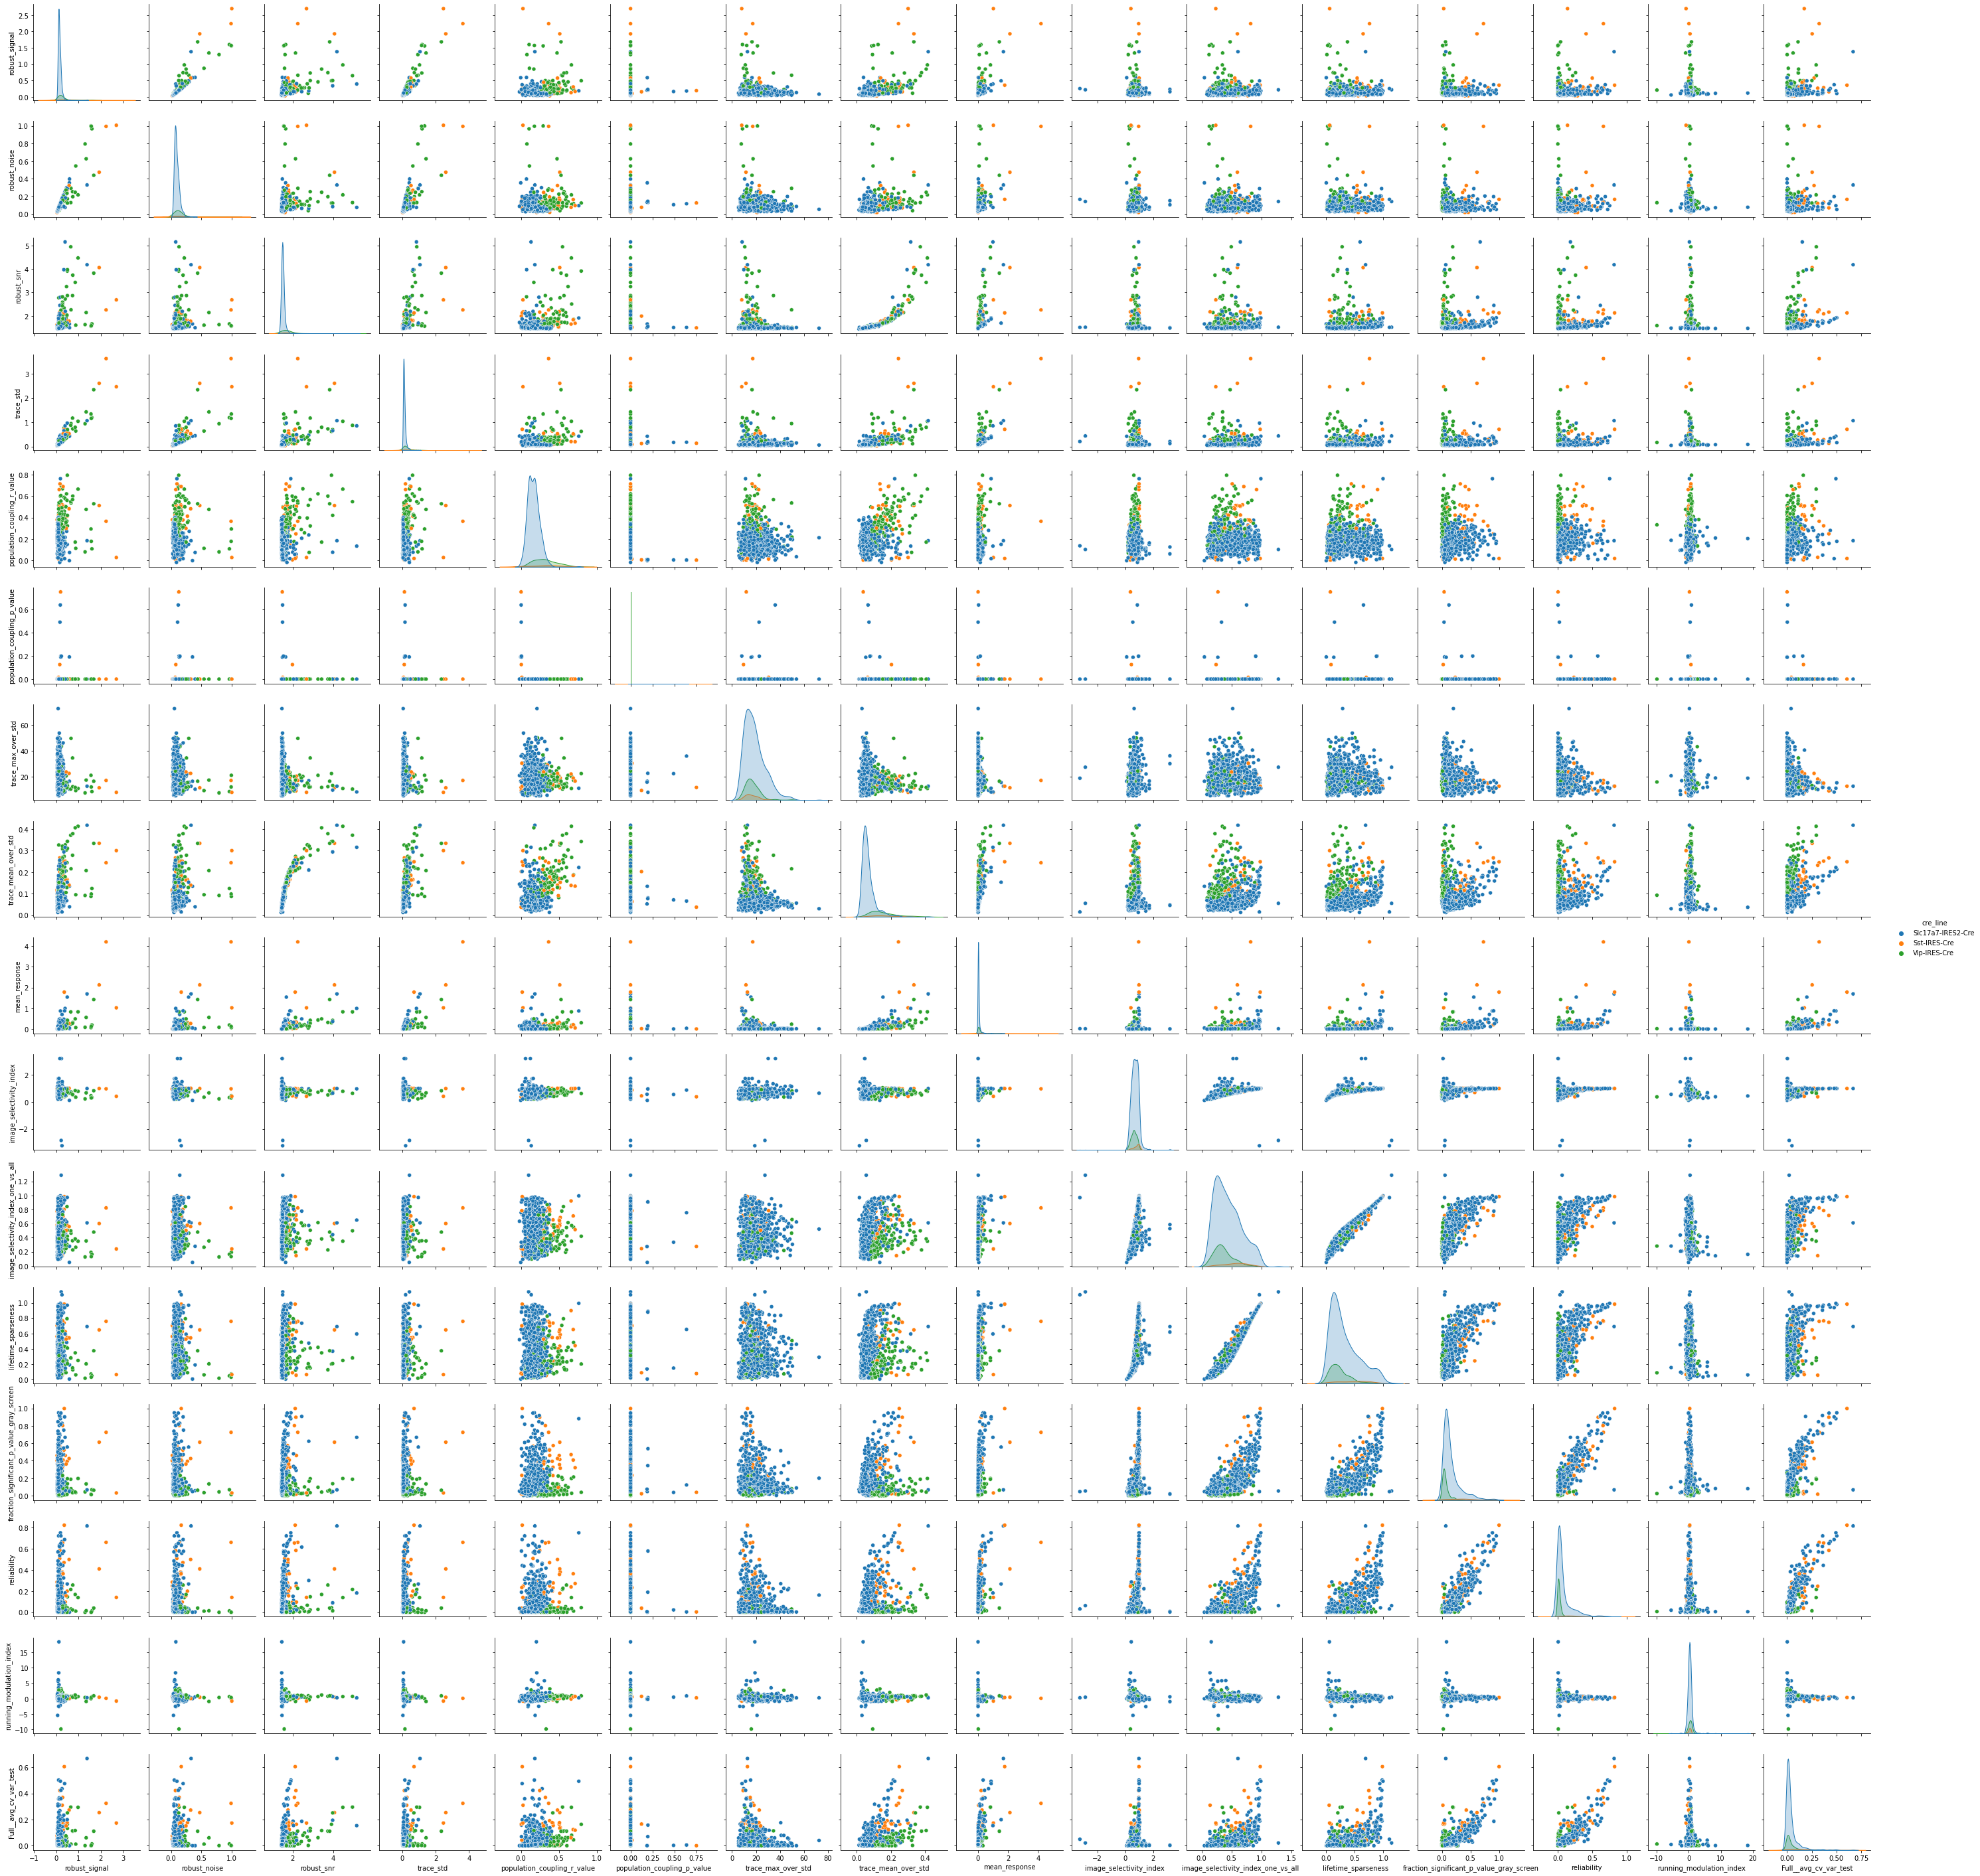

In [20]:
sns.pairplot(
    merged_dff[[
        'robust_signal',
        'robust_noise', 
        'robust_snr', 
        'trace_std', 
        'population_coupling_r_value', 
        'population_coupling_p_value', 
        'trace_max_over_std', 
        'trace_mean_over_std', 
        'mean_response', 
        'image_selectivity_index', 
        'image_selectivity_index_one_vs_all', 
        'lifetime_sparseness', 
        'fraction_significant_p_value_gray_screen', 
        'reliability', 
        'running_modulation_index', 
        'Full__avg_cv_var_test', 
        'cre_line'
    ]].sample(1000),
    hue="cre_line",
    hue_order = np.sort(merged_dff['cre_line'].unique()),
)

(0.0, 1.0)

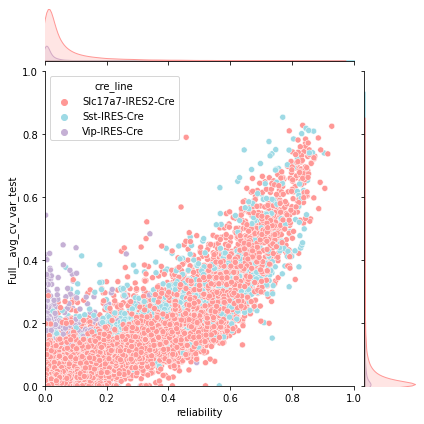

In [36]:
jp = sns.jointplot(
    data = merged_dff,
    y = 'Full__avg_cv_var_test', 
    x = 'reliability',
    hue = 'cre_line',
    hue_order = np.sort(merged_dff['cre_line'].unique()),
    palette = [colors[cre_line] for cre_line in np.sort(merged_dff['cre_line'].unique())]
)
jp.ax_joint.set_xlim(0, 1)
jp.ax_joint.set_ylim(0, 1)

(0.0, 1.0)

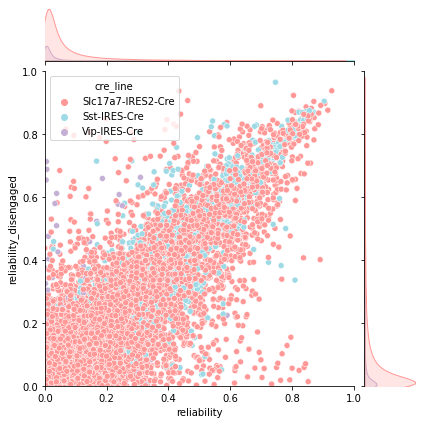

In [55]:
jp = sns.jointplot(
    data = merged_dff,
    y = 'reliability_disengaged', 
    x = 'reliability',
    hue = 'cre_line',
    hue_order = np.sort(merged_dff['cre_line'].unique()),
    palette = [colors[cre_line] for cre_line in np.sort(merged_dff['cre_line'].unique())]
)
jp.ax_joint.set_xlim(0, 1)
jp.ax_joint.set_ylim(0, 1)

(0.0, 1.0)

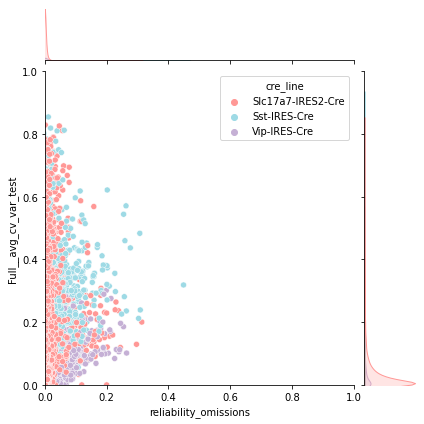

In [47]:
jp = sns.jointplot(
    data = merged_dff,
    y = 'Full__avg_cv_var_test', 
    x = 'reliability_omissions',
    hue = 'cre_line',
    hue_order = np.sort(merged_dff['cre_line'].unique()),
    palette = [colors[cre_line] for cre_line in np.sort(merged_dff['cre_line'].unique())]
)
jp.ax_joint.set_xlim(0, 1)
jp.ax_joint.set_ylim(0, 1)

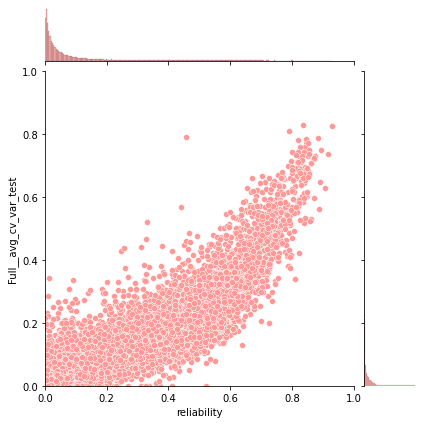

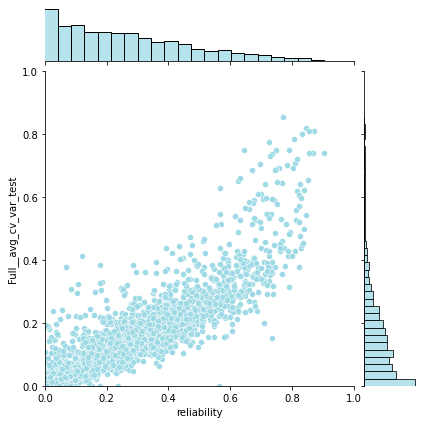

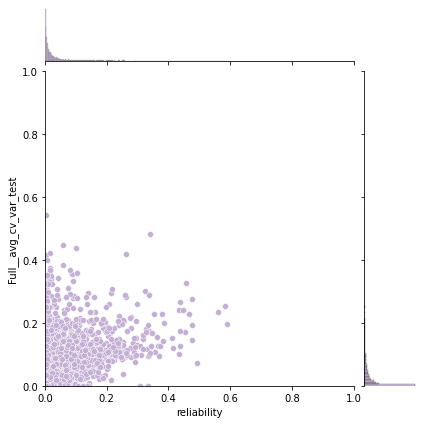

In [35]:
cre_lines = np.sort(merged_dff['cre_line'].unique())
for cre_line in cre_lines:
    jp = sns.jointplot(
        data = merged_dff.query('cre_line == @cre_line'),
        y = 'Full__avg_cv_var_test', 
        x = 'reliability',
        color = colors[cre_line]
    )
    jp.ax_joint.set_xlim(0, 1)
    jp.ax_joint.set_ylim(0, 1)

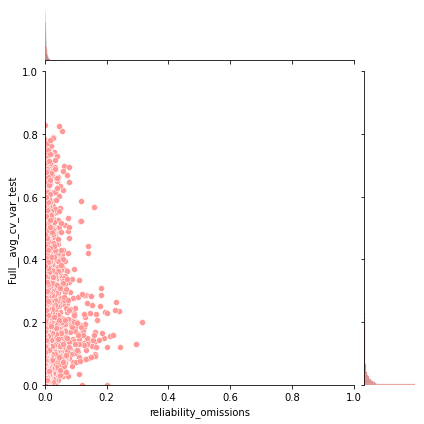

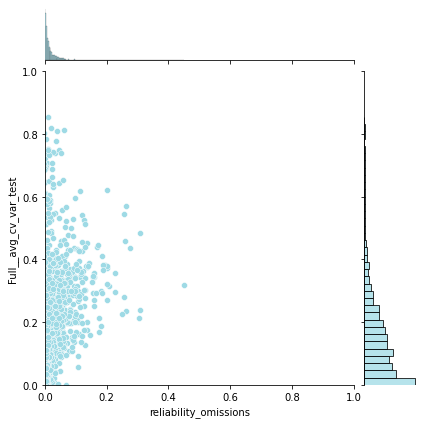

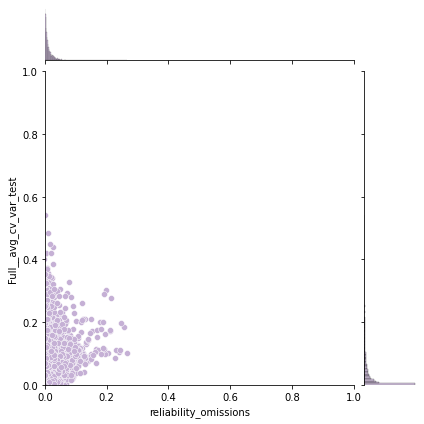

In [48]:
cre_lines = np.sort(merged_dff['cre_line'].unique())
for cre_line in cre_lines:
    jp = sns.jointplot(
        data = merged_dff.query('cre_line == @cre_line'),
        y = 'Full__avg_cv_var_test', 
        x = 'reliability_omissions',
        color = colors[cre_line]
    )
    jp.ax_joint.set_xlim(0, 1)
    jp.ax_joint.set_ylim(0, 1)

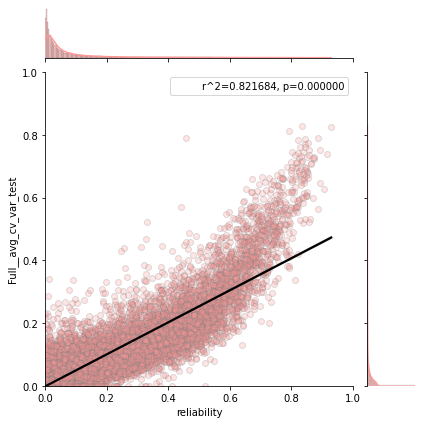

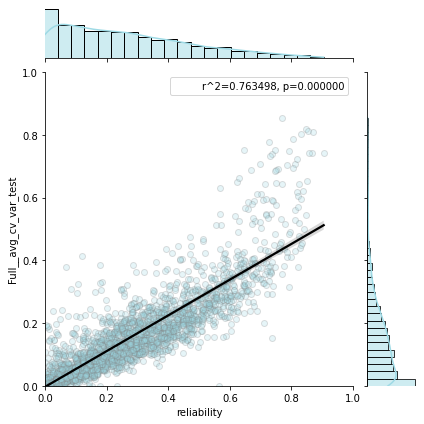

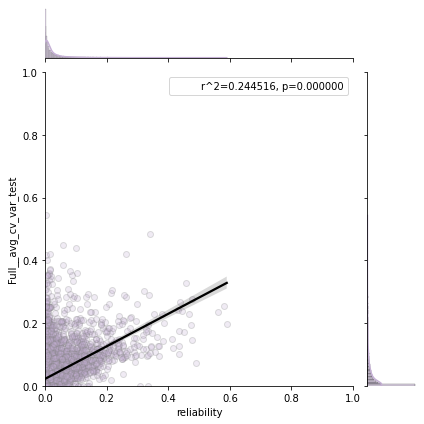

In [78]:
y = 'Full__avg_cv_var_test'
x = 'reliability'
cre_lines = np.sort(merged_dff['cre_line'].unique())
for cre_line in cre_lines:
#     jp = sns.jointplot(
#         data = merged_dff.query('cre_line == @cre_line'),
#         y = 'Full__avg_cv_var_test', 
#         x = 'reliability',
#         color = colors[cre_line]
#     )
#     jp.ax_joint.set_xlim(0, 1)
#     jp.ax_joint.set_ylim(0, 1)
    j = sns.jointplot(
        data = merged_dff.query('cre_line == @cre_line'),
        x = x,
        y = y,
        kind="reg",
        color = colors[cre_line],
        joint_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'alpha':0.25, 'edgecolors':'gray'}},
    )
    r, p = stats.pearsonr(
        merged_dff.query('cre_line == @cre_line').dropna(subset = [x, y])[x],
        merged_dff.query('cre_line == @cre_line').dropna(subset = [x, y])[y],
    )
    phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
    j.ax_joint.legend([phantom],['r^2={:f}, p={:f}'.format(r**2,p)])
    j.fig.tight_layout()
    j.ax_joint.set_xlim(0, 1)
    j.ax_joint.set_ylim(0, 1)

<AxesSubplot:xlabel='reliability', ylabel='Density'>

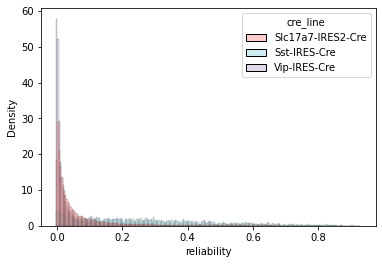

In [86]:
sns.histplot(
    data = merged_dff,
    x = 'reliability',
    hue = 'cre_line',
    stat='density',
    common_norm=False,
    palette = [colors[cre_line] for cre_line in np.sort(merged_dff['cre_line'].unique())],
    hue_order = np.sort(merged_dff['cre_line'].unique()),
)

<AxesSubplot:xlabel='cre_line', ylabel='reliability'>

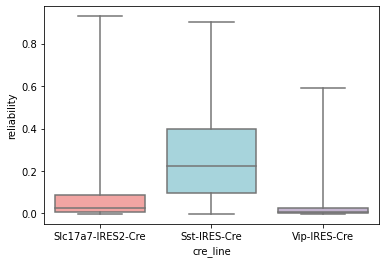

In [88]:
sns.boxplot(
    data = merged_dff,
    x = 'cre_line',
    y = 'reliability',
    palette = [colors[cre_line] for cre_line in np.sort(merged_dff['cre_line'].unique())],
    order = np.sort(merged_dff['cre_line'].unique()),
    whis=np.inf
)

/home/dougo/anaconda3/envs/vba/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


(0.0, 1.0)

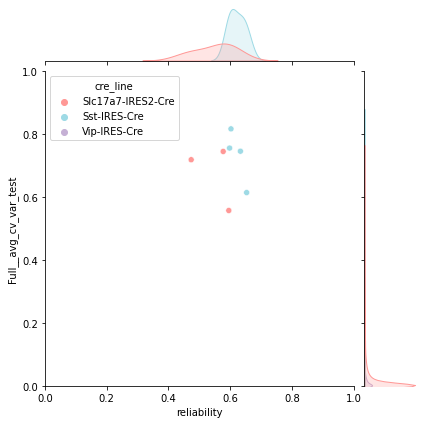

In [37]:
jp = sns.jointplot(
    data = merged_events,
    y = 'Full__avg_cv_var_test', 
    x = 'reliability',
    hue = 'cre_line',
    hue_order = np.sort(merged_dff['cre_line'].unique()),
    palette = [colors[cre_line] for cre_line in np.sort(merged_dff['cre_line'].unique())]
)
jp.ax_joint.set_xlim(0, 1)
jp.ax_joint.set_ylim(0, 1)

In [41]:
pd.isnull(merged_events['reliability']).value_counts()

True     66246
False        7
Name: reliability, dtype: int64

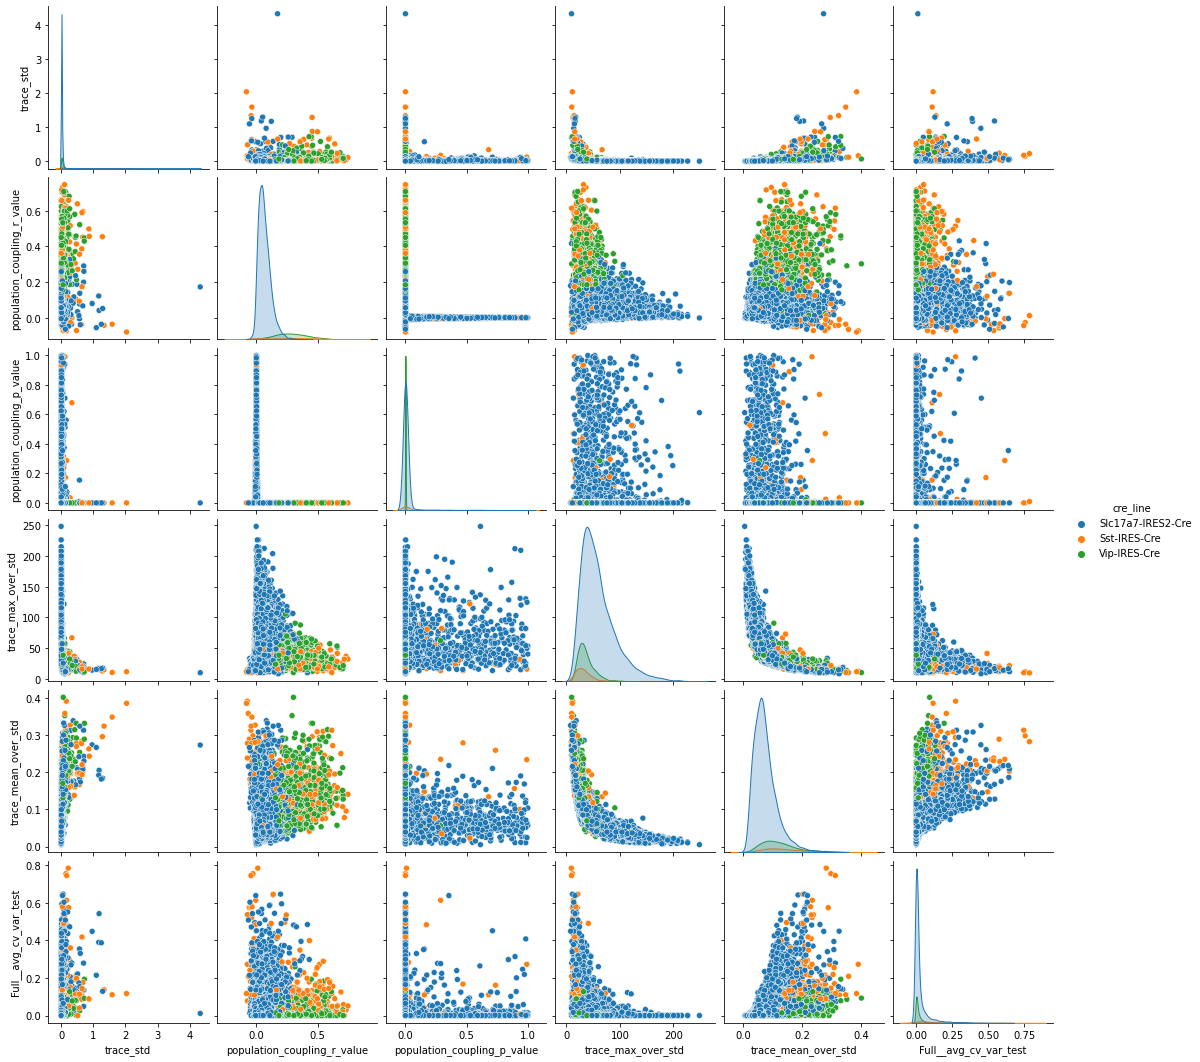

In [24]:
sns.pairplot(
    merged_events[[
        'trace_std', 
        'population_coupling_r_value', 
        'population_coupling_p_value', 
        'trace_max_over_std', 
        'trace_mean_over_std', 
        'Full__avg_cv_var_test', 
        'cre_line'
    ]].sample(10000),
    hue="cre_line",
    hue_order = np.sort(merged_dff['cre_line'].unique())
)

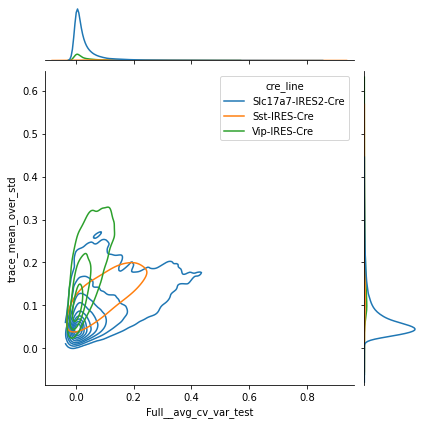

In [35]:
sns.jointplot(
    data = merged_dff.dropna(subset = ['Full__avg_cv_var_test','trace_mean_over_std']),
    x = 'Full__avg_cv_var_test',
    y = 'trace_mean_over_std',
    hue="cre_line",
    hue_order = np.sort(merged_dff['cre_line'].unique()),
    kind='kde'
)